
#Métodos de Monte Carlo

Los métodos de Monte Carlo son una categoría de algoritmos computacionales que usan técnicas de muestreo estadístico para obtener estimaciones numéricas. Estos algoritmos resultan especialmente útiles para problemas que son analíticamente intratables o que tienen un alto costo computacional. A diferencia de los métodos deterministas, que necesitan una formulación analítica precisa del problema, los métodos de Monte Carlo generan soluciones aproximadas mediante la ejecución de muchos experimentos de muestreo aleatorio.

El nombre "Monte Carlo" viene de la aleatoriedad intrínseca en el método, haciendo una analogía con los juegos de azar practicados en el Casino de Monte Carlo en Mónaco.  El método surgió durante la realización del Proyecto Manhattan, donde Stanislaw Ulam y John von Neumann aplicaban técnicas computacionales para tratar problemas en física nuclear. Se le atribuye a Ulam la idea inicial del método, que surgió mientras se recuperaba de una enfermedad y jugaba al solitario. Ulam buscaba estimar la probabilidad de ganar y se dio cuenta de que un muestreo aleatorio de posibles resultados era más eficiente que un cálculo analítico. Al analizar la idea con John von Neumann, se dieron quenta de que el método podía extenderse para resolver una amplia gama de problemas de física estadística.

Actualmente encuentra aplicaciones en diversas disciplinas, incluyendo matemáticas, física, finanzas e inteligencia artificial.

Dada la amplitud del tema, solo vamos a ver los conceptos fundamentales.

Para ilustrar la aplicación del método, vamos a usarlo primero para calcular $\pi$

## Cálculo de $\pi$ usando números al azar

Tomamos un cículo de radio $1$ inscrito en un cuadrado

![circ](https://drive.google.com/uc?export=view&id=1BH3PCs2R3zrNco2n39tZvlAQa0J2ogco)

 y tiramos al azar $N_\square$ puntos dentro del cuadrado. Esto es, puntos $(x,y)$ donde tanto $x$ como $y$ son variables aleatorias con distribución uniforme(-1,1).

Esperamos que el número de puntos que caen dentro del círculo $N_{\circ}$ sea $N_\square$ multiplicado por al área del círculo dividida por el área del cuadrado:

$$N_{\circ} \simeq N_\square\frac{\pi}{4}.$$
Por lo que podemos obtener una aproximación para $\pi$ de
$$\pi\simeq \frac{4N_{\circ}}{N_\square}$$





In [ ]:
import random

def calcula_pi(puntos_en_cuadrado):
    puntos_en_circulo = 0

    for _ in range(puntos_en_cuadrado):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        distancia = x**2 + y**2

        if distancia <= 1:
            puntos_en_circulo += 1

    return 4 * puntos_en_circulo / puntos_en_cuadrado

print(calcula_pi(10000))


3.1532


###Modificando el número de puntos

In [ ]:
import numpy as np

print("N mi_pi error $1/\\sqrt{N}$")
for i in range(1,9):
    n = 10**i
    mi_pi= calcula_pi(n)
    print(n, mi_pi, abs(mi_pi-np.pi)/np.pi, 1/np.sqrt(n))

N mi_pi error $1/\sqrt{N}$
10 3.2 0.018591635788130244 0.31622776601683794
100 3.16 0.005859240340778607 0.1
1000 3.188 0.014771917153924754 0.03162277660168379
10000 3.1544 0.004076704978149292 0.01
100000 3.14248 0.0002824511348385294 0.003162277660168379
1000000 3.138464 0.00099588136807558 0.001
10000000 3.1424032 0.0002580049355796181 0.00031622776601683794
100000000 3.14137716 6.859374004045337e-05 0.0001


* ¿Cómo decrece el error con el número de puntos?

### Error en la integración

Sea $ f(x) $ una función que deseamos integrar sobre un dominio $ D $. La integral
$$
I = \int_{D} f(x) \, dx
$$
puede ser aproximada utilizando métodos de Monte Carlo de la siguiente manera:
$$
I\sim \frac{1}{N} \sum_{i=1}^{N} f(x_i),
$$
donde $ x_i $ son puntos muestreados aleatoriamente dentro de $ D $ y $ N $ es el número de muestras.

El error en la integración de Monte Carlo disminuye como $ \frac{1}{\sqrt{N}}$, donde $ N $ es el número de muestras aleatorias. Esto se entiende a partir del Teorema del Límite Central y la Ley de los Grandes Números.

El Teorema del Límite Central establece que el promedio de un gran número de variables aleatorias independientes e idénticamente distribuidas es aproximadamente normal, independientemente de la distribución original de las variables. La desviación estándar de esta distribución normal (error estándar) es proporcional a $ \frac{\sigma}{\sqrt{N}} $, donde $ \sigma $ es la desviación estándar de la distribución original.

A medida que aumentamos el número de muestras aleatorias, el promedio de las muestras tiende a converger al valor esperado (o media verdadera) de la distribución subyacente. Esto se conoce como la Ley de los Grandes Números.

En la integración de Monte Carlo, la integral se estima como el promedio de los valores de la función en puntos elegidos al azar. A medida que el número de muestras $ N $ aumenta, el promedio se acerca a la media verdadera (valor de la integral) debido a la Ley de los Grandes Números. La variabilidad en esta estimación disminuye como $ \frac{1}{\sqrt{N}} $.


#Cadena de Markov

Veamos otra forma de generar puntos dentro del cuadrado que va a ser útil para otras situaciones más complejas.
Partimos de la esquina superior derecha del cuadrado y proponemos un desplazamiento elegido de manera aleatoria. El objetivo es, como en el caso anterior, recorrer todo el cuadrado de manera uniforme y contar los puntos dentro del círculo. Este es un ejemplo de lo que se conoce como *cadena de Markov*, que veremos de manera más general más adelante.

Al hacer esto tenemos que tomar varias decisiones. Por un lado elegir el tamaño del desplazamiento, teniendo en cuenta que vamos a dar un número finito de pasos.

Si lo elegimos muy corto no vamos a avanzar lo suficiente dentro del cuadrado. Si lo elegimos demasiado grande muy frecuentemente el desplazamiento nos va a llevar afuera del cuadrado.

Este último punto es también importante. ¿Qué hacemos si el desplazamiento nos lleva afuera? La respuesta es que tenemos que rechazar el desplazamiento (no realizarlo). Esto es, dejar al punto dentro del cuadrado y contarlo (**no** descartarlo). Si Rechazamos muchas movidas es posible que contemos muchos puntos que están en el mismo lugar, pero eso es correcto.


In [ ]:
import random

# Comienza en la esquina superior derecha
x, y = 1.0, 1.0
# paso
delta = 1.2

rechazos = 0

n_pasos = 40000
n_circulo = 0
for i in range(n_pasos):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
    else:
        rechazos += 1
    if x**2 + y**2 < 1.0: n_circulo += 1
print ("Pi ~ ",(4.0 * n_circulo) / n_pasos)
print ("Rechazos = ", rechazos/n_pasos)


Pi ~  3.1452
Rechazos =  0.5053



El número de rechazos suele ser un buen indicador de cuan bien estamos recorriendo el espacio de parámetros del sistema. La regla empírica es que tenemos que buscar rechazar la mitad de los desplazamientos. Si rechazamos demasiadas movidas quizás el paso que elegimos es demasiado grande y nos estamos yendo afuera del cuadrado demasiado seguido (no lo estamos recorriendo). Si no rechazamos casi nunca, el paso puede ser demasiado chico y nunca nos acercamos al borde.

El hecho de que tengamos que dejar el punto en el mismo lugar y contarlo cuando rechazamos una movida es algo que dio lugar a mucha discusión cuando se presentó el método. Es un poco confuso porque a los puntos cerca del borde los vamos a contabilizar muchas veces (puede haber muchos rechazos) mientras que esto no va a pasar para los del medio.

##¿Por qué hay contar el punto cuando el desplazamiento es rechazado?

Para ver esto vamos a discretizar el problema a una red de $3\times 3$. (ver el excelente [curso online](https://www.coursera.org/learn/statistical-mechanics) y el libro de Werner Krauth para más detalles)

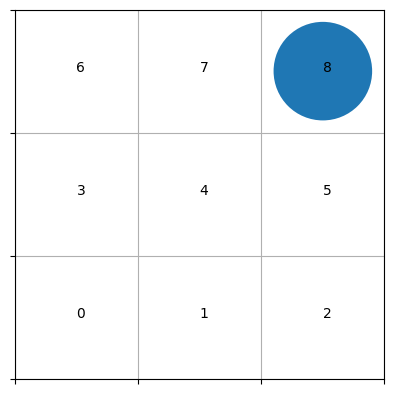

In [ ]:
# @title
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])
ax.grid(True)

circle = patches.Circle((2.5, 2.5), 0.4, fill=True)
for i in range(3):
    for j in range(3):
        celda = i + 3 *j
        ax.text(i + 0.5, j + 0.5, f'{celda}')
ax.add_patch(circle)

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()


El disco (o caminante aleatorio) solo puede moverse en la dirección horizontal o vertical. A cada paso de tiempo tiramos un número al azar entre 0 y 3 para decidir en qué dirección se va a mover: derecha, arriba, izquierda o abajo.  
Lo que buscamos es que para un número grande de movimientos el disco haya estado la misma cantidad de veces en cada cuadrado. Esto es, recorrer de manera uniforme toda la grilla.



In [ ]:
import random

# Tamaño de la grilla
Ng = 3
Nceldas = Ng * Ng

# Dada una posición y un movimiento propuesto da la siguiente celda
def veccel(i, j, move):
    nx = i + move[0]
    ny = j + move[1]
    if( nx < 0 or nx  == Ng or  ny < 0 or ny == Ng):
        return i + Ng * j # si me voy a salir de la grilla me quedo donde estaba
    return nx + Ng * ny # nueva celda

# Movidas posibles: derecha, arriba, izquierda, abajo
moves = [[1,0], [0,1], [-1,0], [0,-1]]

# Generamos una lista de vecinos considerando los casos de rechazo
vecinos = []
for j in range(Ng):
    for i in range(Ng):
        vec_c = []
        for k in range(len(moves)):
            vec_c.append(veccel(i,j, moves[k]))
        vecinos.append(vec_c)
print("Listado de celdas vecinas", vecinos)

# Lista con Nceldas valores inicializados es 0
histo = [0 for _ in range(Nceldas)]

# Número de movimientos a proponer
num_pasos = 100000

# Posición inicial
pos = 8

for _ in range(num_pasos):
    pos = vecinos[pos][random.randint(0, 3)]
    histo[pos] +=1

print("Visitas esperadas en cada celda: ", int(num_pasos/Nceldas))
for i in range(Nceldas):
    print(f"Celda {i} fue visitada {histo[i]} veces")


Listado de celdas vecinas [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2], [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2], [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
Visitas esperadas en cada celda:  11111
Celda 0 fue visitada 11186 veces
Celda 1 fue visitada 11054 veces
Celda 2 fue visitada 11153 veces
Celda 3 fue visitada 10979 veces
Celda 4 fue visitada 11089 veces
Celda 5 fue visitada 11056 veces
Celda 6 fue visitada 10997 veces
Celda 7 fue visitada 11168 veces
Celda 8 fue visitada 11318 veces


##Balance detallado
Esta forma de decidir qué hacer en el borde (quedarnos con el punto cuando rechazamos el cambio)funciona. ¿Por qué?


Consideremos la situación en la esquina superior derecha (celda 8).

Queremos que la probabilidad de encontrar a nuestro disco en esa celda sea $p_8=\frac{1}{9}$ al igual que sus celdas vecinas $p_5=p_7=p_8$.

De la celda $8$ podemos pasar a las celdas vecinas con probabilidades que llamamos $p_{8\to 5}$ y  $p_{8\to 7}$. Vamos a definir también una probabilidad de que se quede en la celda  $p_{8\to 8}$.

La condición de que la probabilidad total esté normalizada a $1$ nos dice que
$$
  p_{8\to 8} + p_{8\to 5} + p_{8\to 7}=1
$$
esto es, o se queda o se va.

Podemos relacionar las probabilidades buscadas $p_i$ con las probabilidades de transición $p_{i\to j}$ usando:

$$
p_8 = p_{7}\, p_{7\to 8} + p_5\, p_{5\to 8} + p_8\, p_{8\to 8}
$$
esto es, la probabilidad de encontrar el disco en la celda $8$ es la probabilidad de que haya estado en una celda vecina y saltado a la celda $8$ sumado a la probabilidad de que haya estado ahí y se quede.

Reordenando:
$$
p_8\,(1- p_{8\to 8}) = p_{7}\, p_{7\to 8} + p_5\, p_{5\to 8}
$$

y usando la ecuación de la normalización a 1:
$$
p_8\,(p_{8\to 5} + p_{8\to 7}) = p_{7}\, p_{7\to 8} + p_5\, p_{5\to 8}
$$

o
$$
p_8\,p_{8\to 5} + p_8\,p_{8\to 7} = p_{7}\, p_{7\to 8} + p_5\, p_{5\to 8}
$$
esta condición se conoce como de balance global.  
Aunque no es la única forma de hacerlo, podemos satisfacer esta ecuación si tomamos

\begin{align}
p_8\,p_{8\to 5} =  p_5\, p_{5\to 8} \\
p_8\,p_{8\to 7} = p_7\, p_{7\to 8}
\end{align}
que se conoce como la condición de balance detallado.
En el caso que nos interesa ahora buscamos $p_i=\text{cte}.$, por lo que nos queda
\begin{align}
p_{8\to 5} = p_{5\to 8} \\
p_{8\to 7} = p_{7\to 8}
\end{align}

Pero esta idea repetida en las otras celdas nos lleva a que todas las probabilidades de transición tienen que ser iguales $p_{i\to j}=\text{cte}.$ para todo par de celdas vecinas. Si miramos la celda central vemos que $p_{4\to j}=\frac{1}{4}$ para todos los $j$ vecinos.
Volviendo a la ecuación para la celda 8 nos queda que $p_{8\to 8}=\frac{1}{2}$ como elegimos para nuestro código. Tenemos una probabilidad $1/2$ de intentar salir de la grilla.


##Matriz de de transferencia



Supongamos que la probabilidad de encontrar al disco en la posición $i$ de la grilla en el paso tiempo $t$ está dado por $\pi_i^t$ ($t$ es un superíndice no una potencia). Podemos escribir estas probabilidades como un vector:
$$
\mathbf{\pi}^t=\begin{pmatrix}\pi_0^t\\
\pi_1^t\\
\vdots\\
\pi_8^t\\
\end{pmatrix}
$$
Por ejemplo, si a tiempo $t=0$ del disco está en la casilla 8, tenemos $\pi_8^0=1$ y el resto de las probabilidades es igual a $0$. Se tiene que cumplir que $\sum_i \pi_i^t=1$ (ojo, en general el vector no tiene norma 1).

Queremos ver cómo evolucionan estas probabilidades en un paso de tiempo, para eso vamos a usar la matriz de transferencia:

$$
\mathbf{\pi}^{t+1}=\begin{pmatrix}
p_{0\to 0} &p_{1\to 0}&\cdots& p_{8\to 0}\\
p_{0\to 1} &p_{1\to 1}&\cdots& p_{8\to 1}\\
\cdots & \cdots &\cdots&\cdots\\
p_{0\to 8} &p_{1\to 8}&\cdots& p_{8\to 8}\\
\end{pmatrix}\mathbf{\pi}^{t}
$$
Completando los valores:
$$
\mathbf{\pi}^{t+1}=\begin{pmatrix}
\frac{1}{2} &\frac{1}{4}&0&\frac{1}{4}&0&0&0&0&0\\
\frac{1}{4} &\frac{1}{4}&\frac{1}{4}&0&\frac{1}{4}&0&0&0&0\\
0 & \frac{1}{4}&\frac{1}{2}& 0&0&\frac{1}{4}&0&0&0\\
\frac{1}{4}& 0&0&\frac{1}{4} &\frac{1}{4}&0&\frac{1}{4}&0&0 \\
0& \frac{1}{4}&0&\frac{1}{4}&0&\frac{1}{4}&0&\frac{1}{4}&0\\
0&0&\frac{1}{4}&0&\frac{1}{4}&\frac{1}{4}&0&0&\frac{1}{4} \\
0&0&0&\frac{1}{4} &0&0&\frac{1}{2}&\frac{1}{4} &0\\
0&0&0&0&\frac{1}{4} &0&\frac{1}{4}&\frac{1}{4}&\frac{1}{4} \\
0&0&0&0&0&\frac{1}{4} &0&\frac{1}{4}&\frac{1}{2} \\
\end{pmatrix}\mathbf{\pi}^{t}
$$

En el código siguiente usamos la matriz de transferencia para ver cómo evolucionan las probabilidades con el paso de tiempo. Partimos de la celda $8$ (probabilidad 1 para esa celda y cero para las otras) y lo único que tenemos que hacer es aplicar la matriz para obtener las probabilidades en función del número de pasos.

In [ ]:
import numpy as np

# Vector de probabilidades
# A tiempo cero está en la casilla 8
p = np.zeros(9)
p[8]=1
print("t=0", p)

# Matriz de transferencia
matrix = np.array([
    [1/2, 1/4, 0, 1/4, 0, 0, 0, 0, 0],
    [1/4, 1/4, 1/4, 0, 1/4, 0, 0, 0, 0],
    [0, 1/4, 1/2, 0, 0, 1/4, 0, 0, 0],
    [1/4, 0, 0, 1/4, 1/4, 0, 1/4, 0, 0],
    [0, 1/4, 0, 1/4, 0, 1/4, 0, 1/4, 0],
    [0, 0, 1/4, 0, 1/4, 1/4, 0, 0, 1/4],
    [0, 0, 0, 1/4, 0, 0, 1/2, 1/4, 0],
    [0, 0, 0, 0, 1/4, 0, 1/4, 1/4, 1/4],
    [0, 0, 0, 0, 0, 1/4, 0, 1/4, 1/2]
])

# Iteramos
for t in range(1,65):
    p = np.dot(matrix,p)
    print(f"t={t}",p)


t=0 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
t=1 [0.   0.   0.   0.   0.   0.25 0.   0.25 0.5 ]
t=2 [0.     0.     0.0625 0.     0.125  0.1875 0.0625 0.1875 0.375 ]
t=3 [0.       0.046875 0.078125 0.046875 0.09375  0.1875   0.078125 0.1875
 0.28125 ]
t=4 [0.0234375  0.0546875  0.09765625 0.0546875  0.1171875  0.16015625
 0.09765625 0.16015625 0.234375  ]
t=5 [0.0390625  0.07324219 0.10253906 0.07324219 0.10742188 0.15234375
 0.10253906 0.15234375 0.19726562]
t=6 [0.05615234 0.08056641 0.10766602 0.08056641 0.11279297 0.13989258
 0.10766602 0.13989258 0.17480469]
t=7 [0.06835938 0.08929443 0.10894775 0.08929443 0.11022949 0.13378906
 0.10894775 0.13378906 0.15734863]
t=8 [0.0788269  0.09420776 0.11024475 0.09420776 0.11154175 0.12757874
 0.11024475 0.12757874 0.14556885]
t=9 [0.08651733 0.09870529 0.110569   0.09870529 0.11089325 0.12373352
 0.110569   0.12373352 0.13657379]
t=10 [0.09261131 0.10167122 0.1108942  0.10167122 0.11121941 0.12044239
 0.1108942  0.12044239 0.13015366]
t=11 [0.09714127 0

vemos que la probabilidad converge rápidamente a un valor estacionario.

El vector que aparece es un autovector de la matriz de transferencia y corresponde a un autovalor $1$. Es justamente la distribución de probabilidad que buscábamos, uniforme en la grilla.

Calculemos los autovectores y autovalores.

In [ ]:
# Los autovectores corresponden a las columnas
eigenvalues, eigenvectors = np.linalg.eig(matrix)

# Indices para ordenar autovalores y autovectores
idx = eigenvalues.argsort()

# Ordenamos usando idx
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

np.set_printoptions(suppress=True)

print("Autovalores:")
print(eigenvalues)
np.set_printoptions(suppress=True)

print("\nAutovectores:")
print(eigenvectors)

# Tomamos el último autovector que corresponde al autovalor 1
p1 = eigenvectors[:, -1]
p1 = p1 /p1.sum()

print(p1)

Autovalores:
[-0.5  -0.    0.    0.25  0.25  0.5   0.75  0.75  1.  ]

Autovectores:
[[-0.16666667  0.40824829  0.0184679  -0.33333333 -0.15526378  0.5
   0.14348254  0.57735027  0.33333333]
 [ 0.33333333 -0.40824829  0.38936246  0.16666667 -0.36481541  0.
  -0.20787726  0.28867513  0.33333333]
 [-0.16666667 -0.         -0.40783036 -0.33333333 -0.15526378 -0.5
  -0.55923706  0.          0.33333333]
 [ 0.33333333 -0.40824829 -0.42629826  0.16666667  0.52007918 -0.
   0.3513598   0.28867513  0.33333333]
 [-0.66666667  0.          0.          0.66666667  0.31052755 -0.
  -0.          0.          0.33333333]
 [ 0.33333333  0.40824829  0.42629826  0.16666667  0.52007918 -0.
  -0.3513598  -0.28867513  0.33333333]
 [-0.16666667 -0.          0.40783036 -0.33333333 -0.15526378 -0.5
   0.55923706  0.          0.33333333]
 [ 0.33333333  0.40824829 -0.38936246  0.16666667 -0.36481541 -0.
   0.20787726 -0.28867513  0.33333333]
 [-0.16666667 -0.40824829 -0.0184679  -0.33333333 -0.15526378  0.5
  -0.1

El autovalor máximo de la matriz de transferencia corresponde a un autovector con componentes positivas. Vemos que el resto de los autovectores tiene componentes negativas, por lo que no pueden ser interpretados como probabilidades. Esto es una manifestación del teorema de [Perron-Frobenius](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem). Esto es, para una matriz con componentes positivas, el autovalor máximo es real y corresponde a un autovector con componentes positivas.

Veamos cuán rápido converge al equilibrio calculando la diferencia de las probabilidades a tiempo $t$ con el vector de probabilidades de equilibrio.

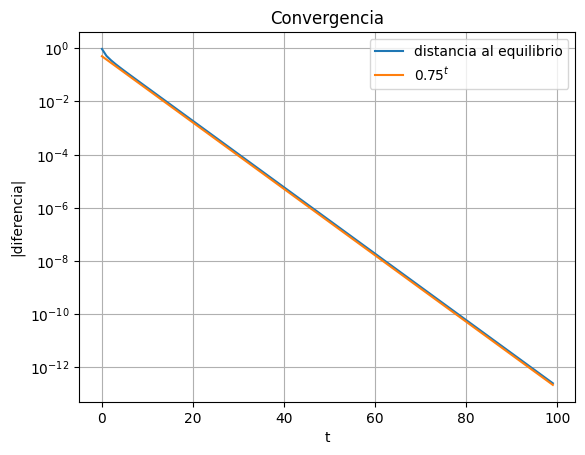

In [ ]:
import matplotlib.pyplot as plt

T=100
diferencia = np.zeros(T)

decae = np.zeros(T)

p = np.zeros(9)
p[8] = 1

## El autovalor de módulo más grande menor a uno.
autov =0.75

init = 0.5
for t in range(T):
    diferencia[t] = np.linalg.norm(p-p1)
    decae[t] = init
    init = init *autov
    p = np.dot(matrix,p)

fig, ax = plt.subplots()
ax.plot(range(T), diferencia, label="distancia al equilibrio")
ax.plot(range(T), decae, '-', label="$0.75^t$")

ax.set(xlabel='t', ylabel='|diferencia|',
       title='Convergencia')
ax.grid()

plt.yscale("log")
plt.legend()
plt.show()

Vemos que la probabilidad se acerca exponencialmente al equilibrio y que el exponente está dado por el segundo autovalor más grande en valor absoluto ($0.75$).

Podemos descomponer el vector inicial como una suma de autovectores.
$$
\mathbf{\pi}^{0}=\sum_i a_i \mathbf{p}_i
$$
Al aplicar la matriz, los autovectores van a ser multiplicados por su autovalor. Luego de t iteraciones vamos a tener:
$$
\mathbf{\pi}^{t}=\sum_i \lambda_i^ta_i \mathbf{p}_i
$$
Donde los $\lambda_i$ son los autovalores asociados a los autovectores $\mathbf{p}_i$ de la matriz de transferencia. Si $|\lambda_i|< 0$, la componente asociada al autovector correspondiente va a decaer exponencialmente como $\lambda_i^t$. Por lo tanto, la convergencia a las probabilidades de equilibro está gobernada por los autovalores más cercanos a 1. En este caso es el autovalor $0.75$. Esto es su peso decae como $0.75^t$ que es lo que se ve en la figura para $t$ suficientemente grande.




## Condiciones para la convergencia

Se puede demostrar que va a existir siempre al menos un autovalor $1$, pero para que esté bien definido el estado de equilibrio, tiene que ser único.

Si hacemos una copia de la grilla de $3\times 3$ pero la probabilidad de saltar de una copia de la grilla a la otra es cero. La matriz de transferencia va a estar compuesta por dos bloques iguales:
$$
\begin{pmatrix}
T&O\\
O&T
\end{pmatrix}
$$
donde $T$ es la matriz de transferencia para una sola grilla y $O$ es la matriz cero.
Escrita completa queda:

\begin{pmatrix}
\frac{1}{2} &\frac{1}{4}&0&\frac{1}{4}&0&0&0&0&0&0&0&0&0&0&0&0&0&0\\
\frac{1}{4} &\frac{1}{4}&\frac{1}{4}&0&\frac{1}{4}&0&0&0&0&0&0&0&0&0&0&0&0&0\\
0 & \frac{1}{4}&\frac{1}{2}& 0&0&\frac{1}{4}&0&0&0&0&0&0&0&0&0&0&0&0\\
\frac{1}{4}& 0&0&\frac{1}{4} &\frac{1}{4}&0&\frac{1}{4}&0&0&0&0&0&0&0&0&0&0&0 \\
0& \frac{1}{4}&0&\frac{1}{4}&0&\frac{1}{4}&0&\frac{1}{4}&0&0&0&0&0&0&0&0&0&0\\
0&0&\frac{1}{4}&0&\frac{1}{4}&\frac{1}{4}&0&0&\frac{1}{4} &0&0&0&0&0&0&0&0&0\\
0&0&0&\frac{1}{4} &0&0&\frac{1}{2}&\frac{1}{4} &0&0&0&0&0&0&0&0&0&0\\
0&0&0&0&\frac{1}{4} &0&\frac{1}{4}&\frac{1}{4}&\frac{1}{4} &0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&\frac{1}{4} &0&\frac{1}{4}&\frac{1}{2} &0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0&\frac{1}{2} &\frac{1}{4}&0&\frac{1}{4}&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0&\frac{1}{4} &\frac{1}{4}&\frac{1}{4}&0&\frac{1}{4}&0&0&0&0\\
0&0&0&0&0&0&0&0&0&0 & \frac{1}{4}&\frac{1}{2}& 0&0&\frac{1}{4}&0&0&0\\
0&0&0&0&0&0&0&0&0&\frac{1}{4}& 0&0&\frac{1}{4} &\frac{1}{4}&0&\frac{1}{4}&0&0 \\
0&0&0&0&0&0&0&0&0&0& \frac{1}{4}&0&\frac{1}{4}&0&\frac{1}{4}&0&\frac{1}{4}&0\\
0&0&0&0&0&0&0&0&0&0&0&\frac{1}{4}&0&\frac{1}{4}&\frac{1}{4}&0&0&\frac{1}{4} \\
0&0&0&0&0&0&0&0&0&0&0&0&\frac{1}{4} &0&0&\frac{1}{2}&\frac{1}{4} &0\\
0&0&0&0&0&0&0&0&0&0&0&0&0&\frac{1}{4} &0&\frac{1}{4}&\frac{1}{4}&\frac{1}{4} \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&\frac{1}{4} &0&\frac{1}{4}&\frac{1}{2} \\
\end{pmatrix}




Esta matriz tiene dos autovalores $1$. Esta no es una situación deseable porque la distribución de probabilidad a la que llegamos va a depender de la grilla en la que comenzó el disco.

Poniendo una pequeña probabilidad de saltar de una grilla a la otra, se va a recuperar un único autovalor $1$. De esa manera, la matriz de transferencia pasa de ser *reducible* a *irreducible*, que es una de las condiciones para llegar al equilibrio.

Otro problema que puede ocurrir es que haya un comportamiento cíclico, por ejemplo si tenemos una grilla con dos casilleros y a cada paso de tiempo el disco solo puede saltar al casillero libre. Eso da lugar a un comportamiento periódico.
* ¿Cómo es la matriz de transferencia en este caso?

La matriz va a tener dos autovalores de módulo: $\{1, -1\}$. Ese problema se puede arreglar agregando una probabilidad finita de que el disco se quede en el lugar donde está y no salte.

Resumiendo, para llegar a la distribución de probabilidad de equilibrio necesitamos:
* Balance global (en general se pide el más exigente balance detallado)
* Irreducibilidad (la matriz de transferencia no se tiene que poder escribir como bloques desacoplados)
* Aperiodicidad. No queremos un comportamiento cíclico.